## Importación de datos y librerias
Primero importamos las librerías que necesitaremos para el análisis y a justo después, el set de datos que vamos a utilizar.


In [153]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/sales_data.csv")


## Previsualizaciones y familiarización con los datos
Antes de hacer cualquier análisis nos fijamos en la estructura y composición del set de datos a través de diferentes funciones.
### Encabezados
Primero veremos la parte superior de nuestro set de datos para ver a simple vista cómo son nuestros datos, que columnas tenemos y con qué tipo de datos vamos a tratar. Esto nos ayuda a tener una idea más clara de los análisis que podemos hacer y como tratar los datos en pasos posteriores. 


In [158]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


### Tipo de datos
Para ver exactamente con qué tipo de datos contamos y poder hacernos una idea de si debemos cambiar alguno, utilizamos la funcion info(). 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             1000 non-null   datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

## Estadísticas
Para comprobar los rangos en los que se mueven los datos y poder ver si hay alguna anormalidad en estos, creamos una tabla con estadísticas descriptivas que incluye la media, la desviación estándard y los cuartiles entre otras medidas. 

In [23]:
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


## Creación de columnas de tiempo
Con tal de facilitar el análisis, crearemos nuevas columnas de mes y día. Esto nos facilitará agrupar nuestros datos mensualmente y crear gráficos que nos ayudarán a sacar conclusiones más robustas. 

In [170]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Month'] = df['Sale_Date'].dt.month
df['Day'] = df['Sale_Date'].dt.day
df['Month_Name'] = df['Sale_Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Month,Year,Day,Month_Name
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2,2023,3,Feb
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,4,2023,21,Apr
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,9,2023,21,Sep
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,8,2023,24,Aug
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,3,2023,24,Mar


### Eliminación de registros
En nuestro dataset solo hay unos pocos registros de 2024 y solo de enero. De manera que no son realmente útiles. Con esto en mente, eliminaremos estos pocos registros para poder hacer agrupaciones por mes sin que estos datos "contaminen" los de 2023.

In [172]:
df = df[df['Year'] == 2023]

### Primeras medidas
Para entender un poco más nuestro set de datos, calculamos una medidas sencillas. Nos gustaría conocer la cantidad total en euros que han habido en ventas en 2023 así como la media mensual y también la cantidad de unidades totales vendidas, así como la media mensual.

In [61]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
print("Ventas totales:", round(df['Sales_Amount'].sum(),2),'€')
print("Media ventas mensual:",  round(df['Sales_Amount'].sum() / 12,2),'€')
print("Cantidad total:", df['Quantity_Sold'].sum(),'unidades')
print("Cantidad media mensual:", round(df['Quantity_Sold'].sum() /12 ,0), ')

Ventas totales: 5019265.23 €
Media ventas mensual: 418272.1 €
Cantidad total: 25355 unidades
Cantidad media mensual: 2113.0 unidades


### Ventas mensuales
A continuación se muestra la evolución de las ventas mes a mes para detectar estacionalidades.


Text(0.5, 0, '')

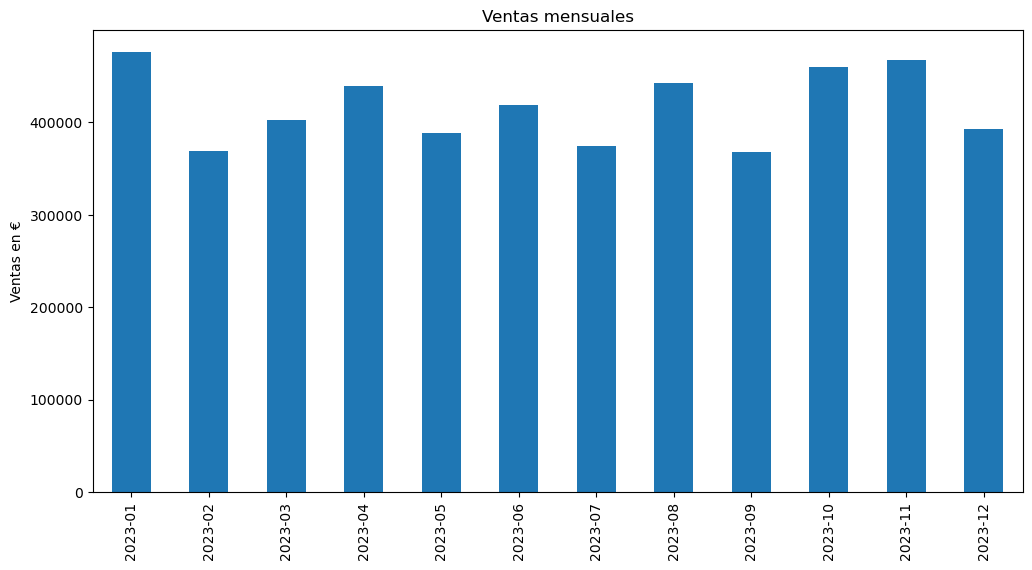

In [121]:


monthly_sales = df.groupby(df['Sale_Date'].dt.to_period('M'))['Sales_Amount'].sum()
monthly_sales.plot(kind='bar', figsize=(12, 6))
plt.title("Ventas mensuales")
plt.ylabel("Ventas en €")
plt.xlabel("")


### Productos más vendidos
A continuación se muestran los tres productos con mayor recaudación.


Text(0.5, 0, 'Cantidad en Millones de €')

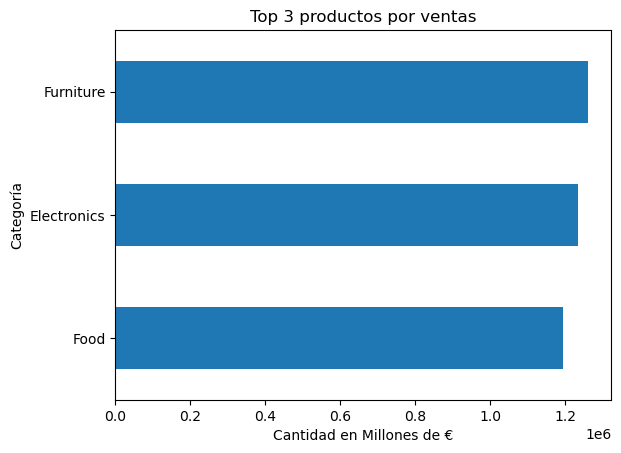

In [139]:
top_products = df.groupby('Product_Category')['Sales_Amount'].sum().sort_values(ascending=True).head(3)
top_products.plot(kind='barh', title='Top 3 productos por ventas')
plt.ylabel("Categoría")
plt.xlabel("Cantidad en Millones de €")

### Regiones por ventas
A continuación se muestran las regiones en las que se ha recaudado más.


<Axes: title={'center': 'Ventas por región'}, ylabel='Region'>

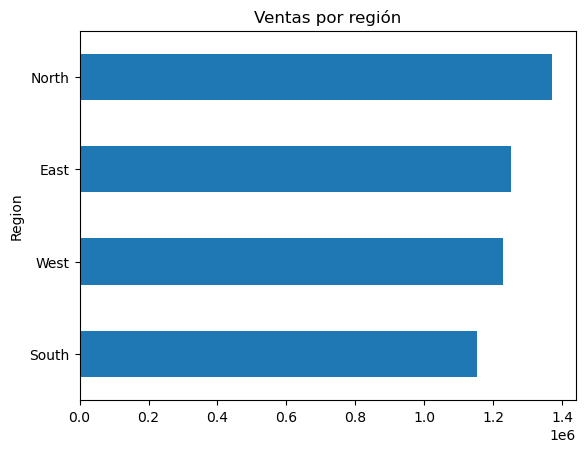

In [141]:
region_sales = df.groupby('Region')['Sales_Amount'].sum().sort_values()
region_sales.plot(kind='barh', title='Ventas por región')

### Tipo de pago
A continuación se muestra qué tipos de pago prefieren los clientes.


Text(0, 0.5, 'Tipo de pago')

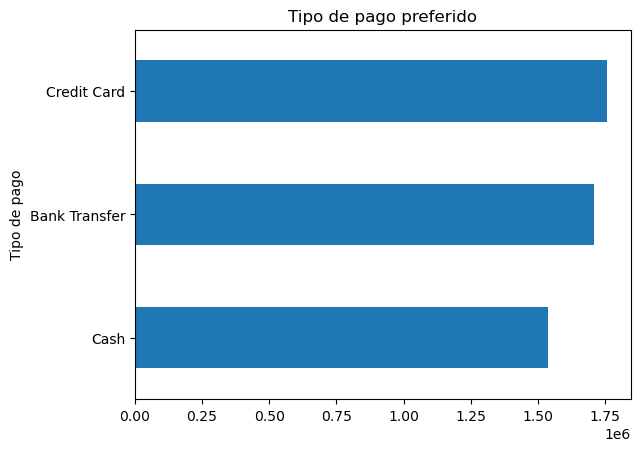

In [145]:
Payment_Method = df.groupby('Payment_Method')['Sales_Amount'].sum().sort_values()
Payment_Method.plot(kind='barh', title='Tipo de pago preferido')
plt.ylabel("Tipo de pago")

### Beneficios 
Para analizar los beneficios obtenidos de la venta de productos y de cómo afectan a los descuentos a los beneficios, calculamos nuevas columnas basandonos en datos de otras columnas que ya tenemos. 

In [198]:
df['Gross_Sales'] = df['Unit_Price'] * df['Quantity_Sold'] #Ganancia bruta
df['Net_Sales'] = df['Gross_Sales'] * (1 - df['Discount']) #Ganancia neta (tras restar el descuento aplicado)
df['Total_Cost'] = df['Unit_Cost'] * df['Quantity_Sold'] #Coste total
df['Profit'] = df['Net_Sales'] - df['Total_Cost'] #Beneficio 
df['Profit Margin'] = df['Profit'] / df['Net_Sales'] #Margen de beneficio

## Margen de beneficio según descuento
Se puede ver en el gráfico que a mayor descuento, menos margen de beneficio y que además, los descuentos no parecen atraer más número de ventas.

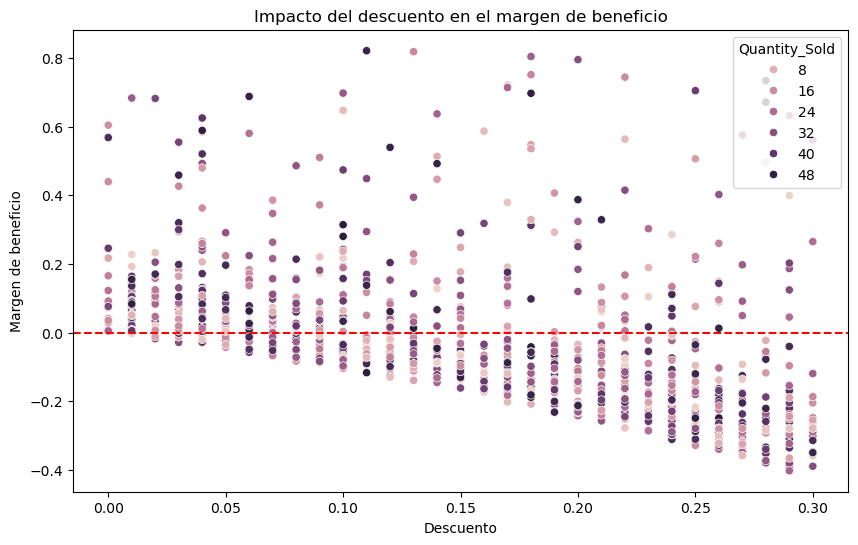

In [209]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit Margin', hue='Quantity_Sold')
plt.title('Impacto del descuento en el margen de beneficio')
plt.xlabel('Descuento')
plt.ylabel('Margen de beneficio')
plt.axhline(0, color='red', linestyle='--')

## Margen de beneficio según descuento por tramos
Se puede observar que los descuentos de entre 0 y 10% generan el mayor margen de beneficio.

C:\Users\Jesus\AppData\Local\Temp\ipykernel_14204\56153415.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_summary = df.groupby('Discount Bin')['Profit Margin'].mean().reset_index()


Text(0.5, 1.0, 'Margen medio según tramo de descuento')

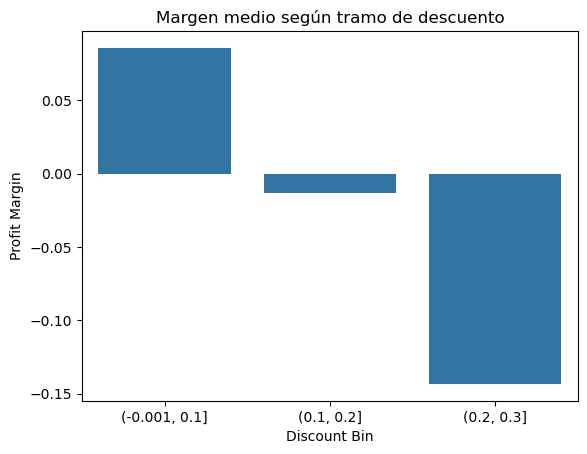

In [195]:
df['Discount Bin'] = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.6, 1], include_lowest=True)

discount_summary = df.groupby('Discount Bin')['Profit Margin'].mean().reset_index()

sns.barplot(data=discount_summary, x='Discount Bin', y='Profit Margin')
plt.title('Margen medio según tramo de descuento')

### Conclusiones

- Las ventas muestran una clara estacionalidad con picos en Noviembre y Enero.
- Los productos más vendidos pertenecen a la categoría de mobiliario.
- La región norte genera el mayor volumen de ingresos mientras que la región sur, la menor.
- Los clientes prefieren el pago con tarjeta.
- Se recomienda enfocar campañas promocionales entre octubre y diciembre.


## Dataset procesado

In [179]:
df.to_csv('cleaned_data.csv')